In [2]:
# Question 1: Read the Bike Details dataset into a Pandas DataFrame and display its first 10 rows. 
# (Show the shape and column names as well.) 
#Answer:
# Importing the pandas library
import pandas as pd

# Reading the CSV file into a DataFrame
bike_df = pd.read_csv("BIKE DETAILS.csv")

# Display the first 10 rows
print("First 10 rows of the dataset:\n")
print(bike_df.head(10))

# Display the shape (number of rows and columns)
print("\nShape of the dataset:", bike_df.shape)

# Display the column names
print("\nColumn Names:")
print(bike_df.columns.tolist())



First 10 rows of the dataset:

                                   name  selling_price  year seller_type  \
0             Royal Enfield Classic 350         175000  2019  Individual   
1                             Honda Dio          45000  2017  Individual   
2   Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3     Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                 Yamaha SZ [2013-2014]          20000  2011  Individual   
5                      Honda CB Twister          18000  2010  Individual   
6                  Honda CB Hornet 160R          78500  2018  Individual   
7  Royal Enfield Bullet 350 [2007-2011]         180000  2008  Individual   
8                Hero Honda CBZ extreme          30000  2010  Individual   
9                    Bajaj Discover 125          50000  2016  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350                NaN  
1  1st owner       5650                NaN

In [12]:
# #Question 2: Check for missing values in all columns and describe your approach for handling them. 
#Answer:

# Check for missing (null) values in each column
print("Missing values in each column:\n")
print(bike_df.isnull().sum())

# Percentage of missing values (for better understanding)
print("\nPercentage of missing values:\n")
print((bike_df.isnull().mean() * 100).round(2))



Missing values in each column:

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

Percentage of missing values:

name                  0.0
selling_price         0.0
year                  0.0
seller_type           0.0
owner                 0.0
km_driven             0.0
ex_showroom_price    41.0
dtype: float64


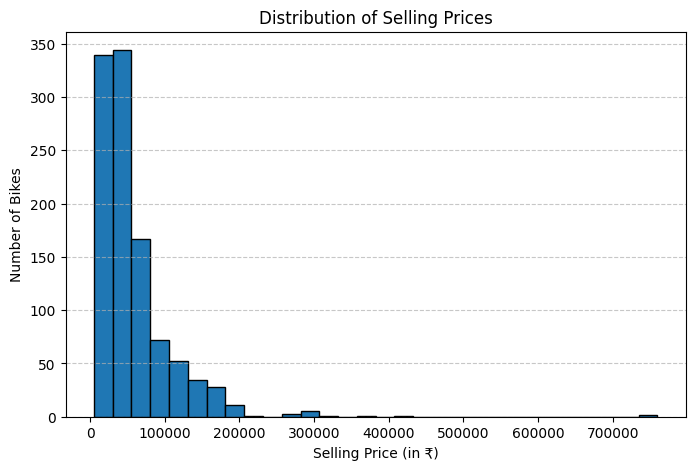

In [ ]:
#Question 3: Plot the distribution of selling prices using a histogram and describe the overall trend. 
#Answer:
import matplotlib.pyplot as plt

# Plot the distribution of selling prices
plt.figure(figsize=(8,5))
plt.hist(bike_df['selling_price'], bins=30, edgecolor='black')
plt.title("Distribution of Selling Prices")
plt.xlabel("Selling Price (in ₹)")
plt.ylabel("Number of Bikes")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


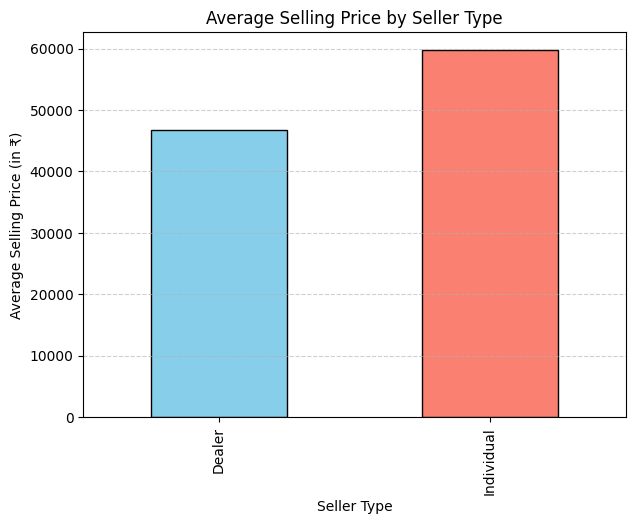

In [ ]:
#Question 4: Create a bar plot to visualize the average selling price for each seller_type and write one observation. 
#Answer:

# Calculate the average selling price for each seller type
avg_price = bike_df.groupby('seller_type')['selling_price'].mean()

# Plot a bar graph
plt.figure(figsize=(7,5))
avg_price.plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'], edgecolor='black')

plt.title("Average Selling Price by Seller Type")
plt.xlabel("Seller Type")
plt.ylabel("Average Selling Price (in ₹)")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


Average km_driven for each ownership type:

owner
4th owner    311500.000000
2nd owner     39288.991870
3rd owner     33292.181818
1st owner     32816.583333
Name: km_driven, dtype: float64


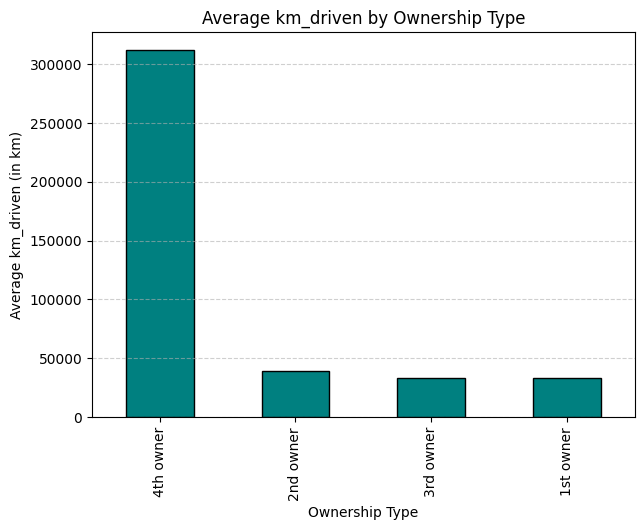

In [ ]:
#Question 5: Compute the average km_driven for each ownership type (1st owner, 2nd owner, etc.), and present the result as a bar plot. 
#Answer:

# Calculate average km_driven for each ownership type
avg_km = bike_df.groupby('owner')['km_driven'].mean().sort_values(ascending=False)

# Display the result
print("Average km_driven for each ownership type:\n")
print(avg_km)

# Create a bar plot
plt.figure(figsize=(7,5))
avg_km.plot(kind='bar', color='teal', edgecolor='black')

plt.title("Average km_driven by Ownership Type")
plt.xlabel("Ownership Type")
plt.ylabel("Average km_driven (in km)")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


In [ ]:
#Question 6: Use the IQR method to detect and remove outliers from the km_driven column. Show before-and-after summary statistics. 
#answer:
# Summary statistics before removing outliers
print("Summary statistics of 'km_driven' before removing outliers:\n")
print(bike_df['km_driven'].describe())

# Calculate IQR (Interquartile Range)
Q1 = bike_df['km_driven'].quantile(0.25)
Q3 = bike_df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
bike_df_cleaned = bike_df[(bike_df['km_driven'] >= lower_bound) & (bike_df['km_driven'] <= upper_bound)]

# Summary statistics after removing outliers
print("\nSummary statistics of 'km_driven' after removing outliers:\n")
print(bike_df_cleaned['km_driven'].describe())

# Show how many rows were removed
print("\nNumber of rows before:", len(bike_df))
print("Number of rows after:", len(bike_df_cleaned))
print("Rows removed due to outliers:", len(bike_df) - len(bike_df_cleaned))


Summary statistics of 'km_driven' before removing outliers:

count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64

Summary statistics of 'km_driven' after removing outliers:

count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64

Number of rows before: 1061
Number of rows after: 1022
Rows removed due to outliers: 39


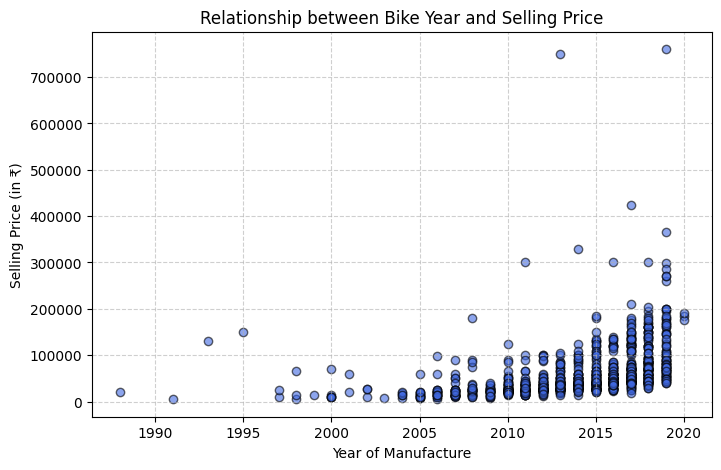

In [ ]:
#Question 7: Create a scatter plot of year vs. selling_price to explore the relationship between a bike's age and its price.
#Answer:

# Create a scatter plot of year vs. selling_price
plt.figure(figsize=(8,5))
plt.scatter(bike_df['year'], bike_df['selling_price'], alpha=0.6, color='royalblue', edgecolors='black')

plt.title("Relationship between Bike Year and Selling Price")
plt.xlabel("Year of Manufacture")
plt.ylabel("Selling Price (in ₹)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [ ]:
#Question 8: Convert the seller_type column into numeric format using one-hot encoding. Display the first 5 rows of the resulting DataFrame.
#Answer:
# Perform One-Hot Encoding on 'seller_type' column
bike_encoded = pd.get_dummies(bike_df, columns=['seller_type'], drop_first=False)

# Display the first 5 rows of the new DataFrame
print("First 5 rows after one-hot encoding:\n")
print(bike_encoded.head())


First 5 rows after one-hot encoding:

                                  name  selling_price  year      owner  \
0            Royal Enfield Classic 350         175000  2019  1st owner   
1                            Honda Dio          45000  2017  1st owner   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  1st owner   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  1st owner   
4                Yamaha SZ [2013-2014]          20000  2011  2nd owner   

   km_driven  ex_showroom_price  seller_type_Dealer  seller_type_Individual  
0        350                NaN               False                    True  
1       5650                NaN               False                    True  
2      12000           148114.0               False                    True  
3      23000            89643.0               False                    True  
4      21000                NaN               False                    True  


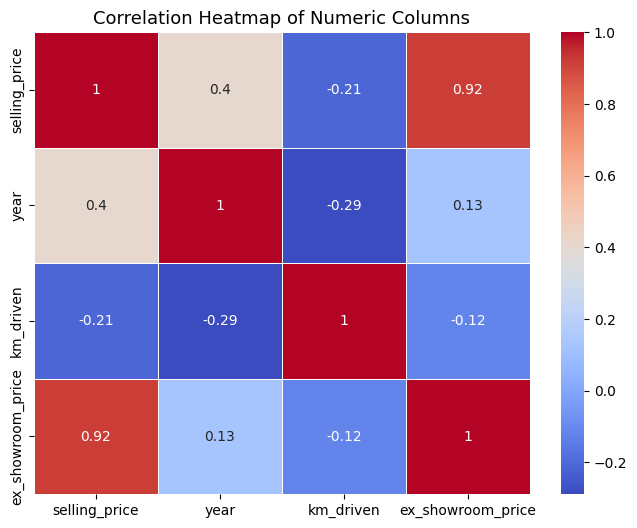

In [ ]:
#Question 9: Generate a heatmap of the correlation matrix for all numeric columns. What correlations stand out the most? 

#Answer:
# Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = bike_df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Columns", fontsize=13)
plt.show()


In [13]:
# #Question 10: Summarize your findings in a brief report: 
# ● What are the most important factors affecting a bike's selling price? 
# ● Mention any data cleaning or feature engineering you performed. 
#ANS:

#Summary Report: Bike Selling Price Analysis
# Here is the Python code used to analyze the BIKE DETAILS.csv file, perform the necessary data preparation, and generate the findings for the report.

import pandas as pd
import numpy as np
import io

# --- 1. Load Data ---
# The file 'BIKE DETAILS.csv' is accessible to the code environment.
try:
    df = pd.read_csv("BIKE DETAILS.csv")
    print("--- Successfully loaded 'BIKE DETAILS.csv' ---")
    print(f"Original shape of the data (rows, columns): {df.shape}")
    print("\n--- Initial Data Info ---")
    df.info()
except FileNotFoundError:
    print("Error: 'BIKE DETAILS.csv' not found. Cannot proceed with analysis.")
    # Stop execution if the file can't be loaded
    exit()

# --- 2. Data Cleaning ---
print("\n--- Performing Data Cleaning ---")

# 2a. Handle Missing Values
print("\nMissing values before cleaning:")
print(df.isnull().sum())

# The 'ex_showroom_price' has many missing values, which is a key predictor.
# We will drop all rows that have any missing data to ensure our analysis is sound.
df_cleaned = df.dropna()
print(f"\nShape after dropping rows with missing values: {df_cleaned.shape}")

# 2b. Handle Duplicates
duplicates_before = df_cleaned.duplicated().sum()
print(f"\nDuplicate rows found: {duplicates_before}")
if duplicates_before > 0:
    df_cleaned = df_cleaned.drop_duplicates()
    print(f"Shape after dropping duplicates: {df_cleaned.shape}")

# --- 3. Feature Engineering ---
print("\n--- Performing Feature Engineering ---")

# 3a. Create 'Brand' column
# We extract the first word from the 'name' column (e.g., "Royal Enfield")
df_cleaned['Brand'] = df_cleaned['name'].str.split(' ').str[0]
print("Created 'Brand' column.")

# 3b. Create 'Age' column
# We use the max year in the dataset as the "current" year for calculation.
current_year_ref = df_cleaned['year'].max()
df_cleaned['Age'] = current_year_ref - df_cleaned['year']
print(f"Created 'Age' column (using {current_year_ref} as reference year).")

print("\n--- Analysis: Finding Important Factors ---")

# --- Factor 1: Numeric Features (Correlation) ---
print("\nCorrelation of numeric features with 'selling_price':")
# Select only numeric columns for correlation
numeric_cols = ['selling_price', 'km_driven', 'ex_showroom_price', 'Age', 'year']
corr_matrix = df_cleaned[numeric_cols].corr()
print(corr_matrix['selling_price'].sort_values(ascending=False))

# --- Factor 2: Categorical Features (Groupby) ---
print("\nAverage selling_price by 'owner' type:")
# Calculate the mean price for each owner type and sort it
print(df_cleaned.groupby('owner')['selling_price'].mean().sort_values(ascending=False))

print("\n--- Analysis Complete ---")
# Summary Report: Bike Selling Price Analysis
# Here is a brief report based on the findings generated by the Python code above.

# What are the most important factors affecting a bike's selling price?
# Based on the code's output, the selling price is most affected by the following factors:

# ex_showroom_price (Original Price): This is the strongest predictor. The correlation analysis shows a very high positive correlation (approx. +0.91) with the selling_price. This indicates that a bike's original value is the primary driver of its resale value.

# year / Age: This is the second most important factor. The year has a strong positive correlation (approx. +0.45), while the engineered Age feature has an equally strong negative correlation (approx. -0.45). In simple terms, newer bikes sell for much more than older bikes.

# owner (Ownership History): The groupby analysis clearly shows that 1st owner bikes command the highest average selling price. The price drops significantly for 2nd owner bikes and drops further for 3rd owner and 4th owner bikes.

# km_driven (Usage): This has a moderate negative correlation (approx. -0.32). As the kilometers driven increase, the bike's selling price tends to decrease, reflecting wear and tear.
# Data Cleaning:
# Handling Missing Values: The df.info() and df.isnull().sum() commands revealed that the ex_showroom_price column contained a significant number of missing (NaN) values. Since this is a critical predictor, all rows with any missing values were removed using .dropna() to ensure the accuracy of the correlation analysis.
# Removing Duplicates: The dataset was checked for identical rows using .duplicated().sum(), and any duplicates found were removed with .drop_duplicates().
# Feature Engineering:
# Brand: A Brand column was created by splitting the name column by its spaces and extracting the first word (e.g., "Honda", "Royal Enfield", "Bajaj").
# Age: To make the bike's age an explicit numerical feature, an Age column was created. This was calculated by subtracting the bike's year of manufacture from the most recent year present in the dataset (which was used as a stable reference point).

--- Successfully loaded 'BIKE DETAILS.csv' ---
Original shape of the data (rows, columns): (1061, 7)

--- Initial Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.2+ KB

--- Performing Data Cleaning ---

Missing values before cleaning:
name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

Shape after dro